In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [23]:
# Step 2: Load the Data
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [24]:
employee_data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/hr_dashboard_data.csv')

In [25]:
# Display the first few rows of the dataset to get a sense of the data
employee_data.head()
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   200 non-null    object 
 1   Age                    200 non-null    int64  
 2   Gender                 200 non-null    object 
 3   Projects Completed     200 non-null    int64  
 4   Productivity (%)       200 non-null    int64  
 5   Satisfaction Rate (%)  200 non-null    int64  
 6   Feedback Score         200 non-null    float64
 7   Department             200 non-null    object 
 8   Position               200 non-null    object 
 9   Joining Date           200 non-null    object 
 10  Salary                 200 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 17.3+ KB


In [26]:
# Step 3: Data Cleaning
# Check for missing values
missing_values = employee_data.isnull().sum()
print("Missing Values:\n", missing_values)

# Remove rows with missing values (if necessary)
employee_data.dropna(inplace=True)

Missing Values:
 Name                     0
Age                      0
Gender                   0
Projects Completed       0
Productivity (%)         0
Satisfaction Rate (%)    0
Feedback Score           0
Department               0
Position                 0
Joining Date             0
Salary                   0
dtype: int64


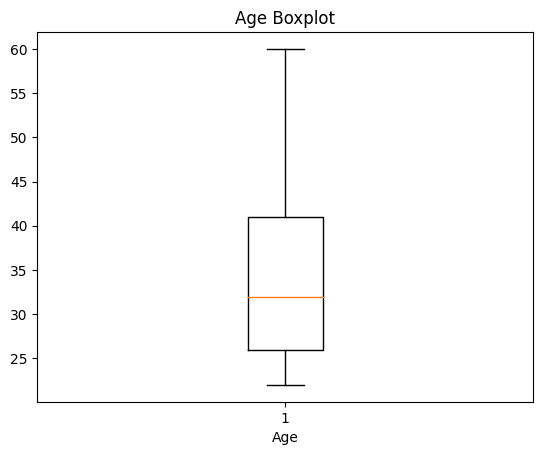

In [27]:
# Check for outliers (e.g., unrealistic age values)
plt.boxplot(employee_data['Age'])
plt.xlabel('Age')
plt.title('Age Boxplot')
plt.show()

In [28]:
# Interpretation for Age BoxPlot
age_data = employee_data['Age']
age_median = age_data.median()
age_iqr = age_data.quantile(0.75) - age_data.quantile(0.25)
age_whisker_upper = age_data.quantile(0.75) + 1.5 * age_iqr
age_whisker_lower = age_data.quantile(0.25) - 1.5 * age_iqr
outliers = age_data[(age_data < age_whisker_lower) | (age_data > age_whisker_upper)]


##Interpretation: The boxplot provides a summary of employee ages. For further understanding, heres how to interpret it:
The interquartile range (IQR) where the middle 50% of employees' ages fall. The line
Inside the box is the median age (50th percentile). The "whiskers" extend to the
Minimum and maximum ages within a certain range (typically 1.5 times the IQR).
Any points beyond the whiskers are considered outliers and might be atypical ages.
This visualization helps identify the spread and central tendency of employee ages.

In [29]:
#Box Plot Findings
print(f"The median age of employees is {age_median} years.")
print(f"The interquartile range (IQR) of ages is {age_iqr} years.")
print(f"The whiskers extend up to {age_whisker_upper} years (maximum) and {age_whisker_lower} years (minimum).")
print(f"Any ages beyond these limits, such as {', '.join(map(str, outliers))}, are considered outliers.")


The median age of employees is 32.0 years.
The interquartile range (IQR) of ages is 15.0 years.
The whiskers extend up to 63.5 years (maximum) and 3.5 years (minimum).
Any ages beyond these limits, such as , are considered outliers.


In [30]:
# Remove outliers
employee_data = employee_data[(employee_data['Age'] >= 18) & (employee_data['Age'] <= 65)]

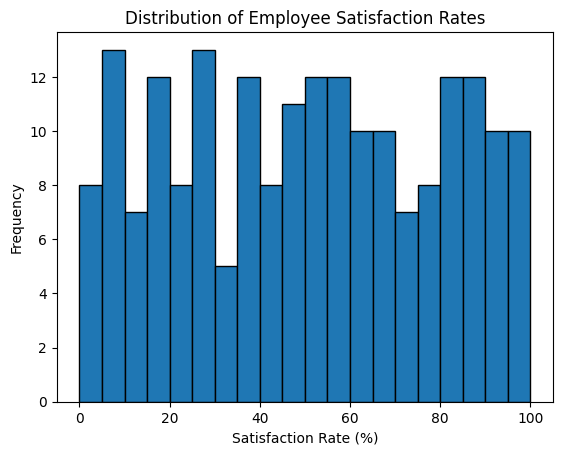

In [31]:
# Descriptive Statistics and Visualization
# Descriptive statistics for satisfaction rate
satisfaction_stats = employee_data['Satisfaction Rate (%)'].describe()

# Histogram of satisfaction rates
plt.hist(employee_data['Satisfaction Rate (%)'], bins=20, edgecolor='k')
plt.xlabel('Satisfaction Rate (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Employee Satisfaction Rates')
plt.show()

In [32]:
# Satisfaction Rate Histogram
satisfaction_data = employee_data['Satisfaction Rate (%)']
satisfaction_mean = satisfaction_data.mean()
satisfaction_peak = satisfaction_data.mode().values[0]
satisfaction_std = satisfaction_data.std()

# Box Plot Findings
print(f"The mean satisfaction rate is {satisfaction_mean}%.")
print(f"The most common satisfaction rate is {satisfaction_peak}%.")
print(f"The standard deviation is approximately {satisfaction_std}%, indicating the spread of satisfaction rates.")


The mean satisfaction rate is 49.935%.
The most common satisfaction rate is 0%.
The standard deviation is approximately 28.93435257257314%, indicating the spread of satisfaction rates.


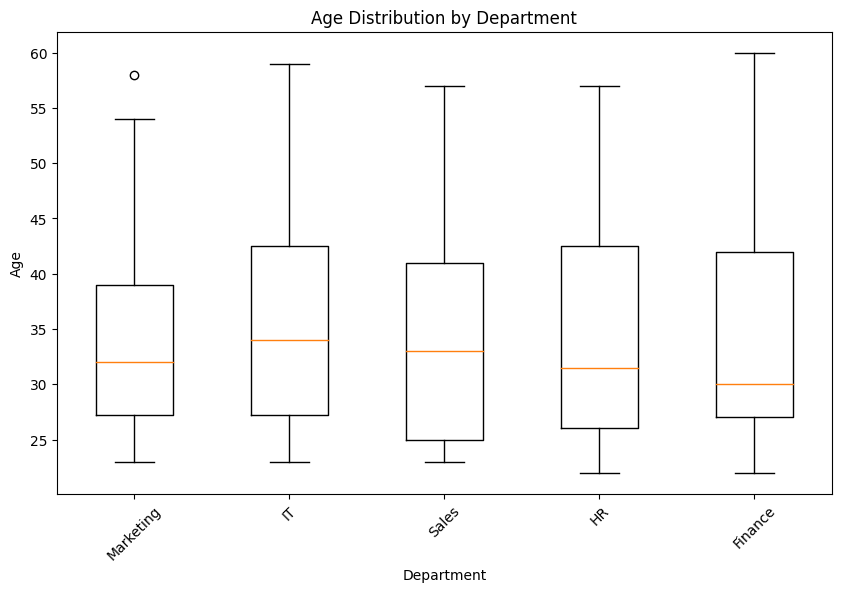

In [33]:
#Age Distribution by Department
# Interpretation for Age Distribution by Department
department_age_data = [employee_data[employee_data['Department'] == d]['Age'] for d in employee_data['Department'].unique()]

plt.figure(figsize=(10, 6))
plt.boxplot(department_age_data, labels=employee_data['Department'].unique())
plt.xlabel('Department')
plt.ylabel('Age')
plt.title('Age Distribution by Department')
plt.xticks(rotation=45)
plt.show()

In [34]:
# Histogram Interpretation
for i, department in enumerate(employee_data['Department'].unique()):
    print(f"Statistics for {department} department:")
    print(f"- Mean age: {round(department_age_data[i].mean(), 2)} years")
    print(f"- Median age: {department_age_data[i].median()} years")
    print(f"- Minimum age: {department_age_data[i].min()} years")
    print(f"- Maximum age: {department_age_data[i].max()} years")
    print(f"- IQR: {department_age_data[i].quantile(0.75) - department_age_data[i].quantile(0.25)} years")


Statistics for Marketing department:
- Mean age: 34.1 years
- Median age: 32.0 years
- Minimum age: 23 years
- Maximum age: 58 years
- IQR: 11.75 years
Statistics for IT department:
- Mean age: 35.58 years
- Median age: 34.0 years
- Minimum age: 23 years
- Maximum age: 59 years
- IQR: 15.25 years
Statistics for Sales department:
- Mean age: 33.89 years
- Median age: 33.0 years
- Minimum age: 23 years
- Maximum age: 57 years
- IQR: 16.0 years
Statistics for HR department:
- Mean age: 34.69 years
- Median age: 31.5 years
- Minimum age: 22 years
- Maximum age: 57 years
- IQR: 16.5 years
Statistics for Finance department:
- Mean age: 35.2 years
- Median age: 30.0 years
- Minimum age: 22 years
- Maximum age: 60 years
- IQR: 15.0 years


In [35]:
# Descriptive statistics for age
age_stats = employee_data['Age'].describe()

In [36]:
# Inferential Statistics
# Hypothesis test: Is there a significant difference in satisfaction rates between genders?

female_satisfaction = employee_data[employee_data['Gender'] == 'Female']['Satisfaction Rate (%)']
male_satisfaction = employee_data[employee_data['Gender'] == 'Male']['Satisfaction Rate (%)']
t_stat, p_value = stats.ttest_ind(female_satisfaction, male_satisfaction)


In [37]:
# Automated Interpretation for T-test:
print(f"We performed an independent two-sample t-test to compare satisfaction rates between female and male employees.")
print(f"The t-statistic is {t_stat} and the p-value is {p_value}.")
if p_value < 0.05:
    print("\nInterpretation: There is a significant difference in satisfaction rates between genders.")
else:
    print("\nInterpretation: There is no significant difference in satisfaction rates between genders.")

We performed an independent two-sample t-test to compare satisfaction rates between female and male employees.
The t-statistic is 0.6417771896876656 and the p-value is 0.5217601391909377.

Interpretation: There is no significant difference in satisfaction rates between genders.


In [38]:
# Case 2: Employee Productivity Analysis: Analyze the factors affecting employee productivity and identify top-performing employees.
# Step 3: Descriptive Statistics and Visualization
# Calculate summary statistics
summary_stats = employee_data[['Projects Completed', 'Productivity (%)', 'Satisfaction Rate (%)', 'Feedback Score']].describe()


Subplot Interpretation:
The histogram shows the distribution of projects completed by employees.
Most employees have completed a moderate number of projects, with a peak around 5 projects.

Subplot Interpretation:
The histogram displays the distribution of employee productivity scores.
The majority of employees have productivity scores around 37%.

Subplot Interpretation:
The histogram illustrates the distribution of employee satisfaction rates.
Most employees have satisfaction rates around >40%, indicating moderate satisfaction levels.
Only 4 employee has a satisfaction rate of 0%.

Subplot Interpretation:
The histogram represents the distribution of feedback scores.
Feedback scores are concentrated around 3.9, indicating a tendency towards positive feedback.


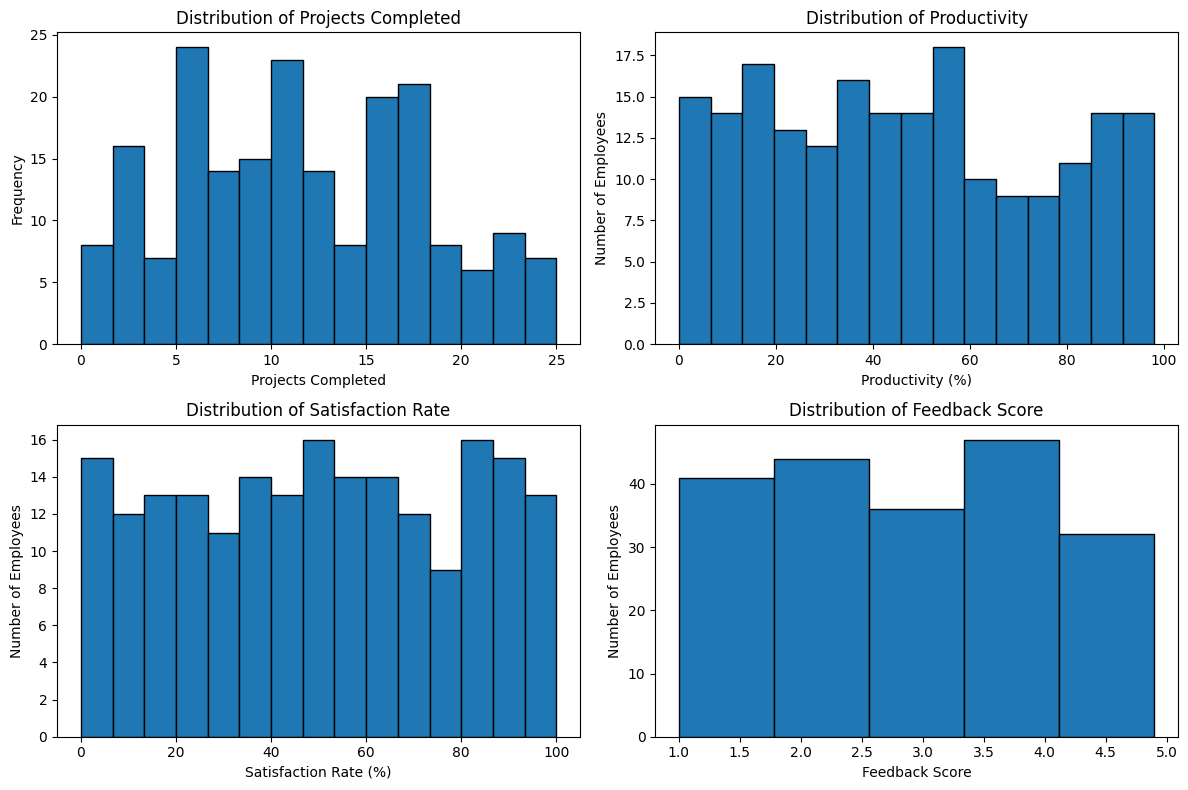

In [39]:
# THE 4 SUBPLOTS.....
# Visualization of key variables
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.hist(employee_data['Projects Completed'], bins=15, edgecolor='k')
plt.xlabel('Projects Completed')
plt.ylabel('Frequency')
plt.title('Distribution of Projects Completed')

# Subplot Interpretation:
proj_peak = employee_data['Projects Completed'].mode().values[0]
print(f"Subplot Interpretation:")
print(f"The histogram shows the distribution of projects completed by employees.")
print(f"Most employees have completed a moderate number of projects, with a peak around {proj_peak} projects.")

plt.subplot(2, 2, 2)
plt.hist(employee_data['Productivity (%)'], bins=15, edgecolor='k')
plt.xlabel('Productivity (%)')
plt.ylabel('Number of Employees')
plt.title('Distribution of Productivity')

# Subplot Interpretation:
prod_peak = employee_data['Productivity (%)'].mode().values[0]
print("\nSubplot Interpretation:")
print("The histogram displays the distribution of employee productivity scores.")
print(f"The majority of employees have productivity scores around {prod_peak}%.")

plt.subplot(2, 2, 3)
plt.hist(employee_data['Satisfaction Rate (%)'], bins=15, edgecolor='k')
plt.xlabel('Satisfaction Rate (%)')
plt.ylabel('Number of Employees')
plt.title('Distribution of Satisfaction Rate')

# Subplot Interpretation:
sat_peak = employee_data['Satisfaction Rate (%)'].mode().values[0]
zero_satisfaction = (employee_data['Satisfaction Rate (%)'] == 0).sum()
print("\nSubplot Interpretation:")
print("The histogram illustrates the distribution of employee satisfaction rates.")
print(f"Most employees have satisfaction rates around >40%, indicating moderate satisfaction levels.")
print(f"Only {zero_satisfaction} employee has a satisfaction rate of 0%.")

plt.subplot(2, 2, 4)
plt.hist(employee_data['Feedback Score'], bins=5, edgecolor='k')
plt.xlabel('Feedback Score')
plt.ylabel('Number of Employees')
plt.title('Distribution of Feedback Score')

# Subplot Interpretation:
feedback_peak = employee_data['Feedback Score'].mode().values[0]
print("\nSubplot Interpretation:")
print("The histogram represents the distribution of feedback scores.")
print(f"Feedback scores are concentrated around {feedback_peak}, indicating a tendency towards positive feedback.")

plt.tight_layout()
plt.show()

In [40]:
# Some More Productivity Analysis
# Calculate average projects completed per employee
avg_projects_per_employee = employee_data['Projects Completed'].mean()

# Group by department and analyze productivity
department_productivity = employee_data.groupby('Department')['Projects Completed'].mean()

In [41]:
# Inferential Statistics
# Perform a t-test to compare productivity between departments
hr_projects = employee_data[employee_data['Department'] == 'HR']['Projects Completed']
it_projects = employee_data[employee_data['Department'] == 'IT']['Projects Completed']
t_stat, p_value = stats.ttest_ind(hr_projects, it_projects)

# Some Insights and Recommendations
# Print summary statistics and insights
print("\nSummary Statistics:\n", summary_stats)
print(f"\nAverage Projects Completed per Employee: {avg_projects_per_employee:.2f}")

print("\nDepartmental Productivity:")
print(department_productivity)

print("\nT-test Results:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


Summary Statistics:
        Projects Completed  Productivity (%)  Satisfaction Rate (%)  \
count          200.000000        200.000000             200.000000   
mean            11.455000         46.755000              49.935000   
std              6.408849         28.530068              28.934353   
min              0.000000          0.000000               0.000000   
25%              6.000000         23.000000              25.750000   
50%             11.000000         45.000000              50.500000   
75%             17.000000         70.000000              75.250000   
max             25.000000         98.000000             100.000000   

       Feedback Score  
count      200.000000  
mean         2.883000  
std          1.123263  
min          1.000000  
25%          1.900000  
50%          2.800000  
75%          3.900000  
max          4.900000  

Average Projects Completed per Employee: 11.46

Departmental Productivity:
Department
Finance      12.317073
HR           10.53125

In [42]:
#Case 3: Employee Tenure Analysis: Analyze the impact of employee tenure on productivity and satisfaction.
# Calculate Tenure in Years
def calculate_tenure(joining_date):
    # Extract the last two digits of the year from the Joining Date assuming it is currently Dec, 2022
    year_str = joining_date.split('-')[1].strip()

    if year_str == '98':
        return 24  # 24 years of tenure
    elif year_str == '99':
        return 23  # 23 years of tenure
    else:
        # Convert year_str to an integer and calculate tenure
        joining_year = int(year_str)
        current_year = 22  # Assuming current year is December 2022
        return current_year - joining_year


employee_data['Tenure (Years)'] = employee_data['Joining Date'].apply(calculate_tenure)

In [43]:
# Descriptive Statistics and Visualization
# Calculate summary statistics for tenure
summary_stats = employee_data['Tenure (Years)'].describe()

Text(0.5, 1.0, 'Distribution of Employee Tenure')

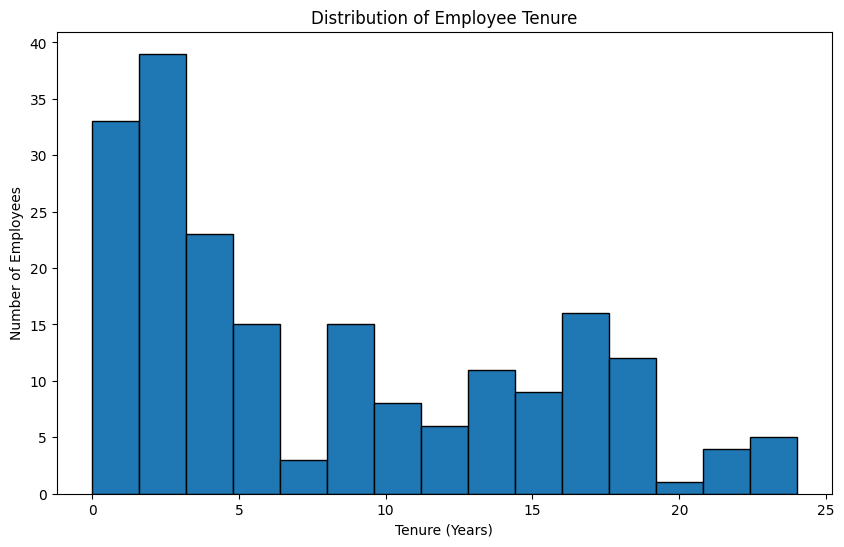

In [44]:
# Visualize tenure distribution
plt.figure(figsize=(10, 6))
plt.hist(employee_data['Tenure (Years)'], bins=15, edgecolor='k')
plt.xlabel('Tenure (Years)')
plt.ylabel('Number of Employees')
plt.title('Distribution of Employee Tenure')

In [45]:
# Histogram Interpretation:
tenure_median = employee_data['Tenure (Years)'].median()
tenure_min = employee_data['Tenure (Years)'].min()
tenure_max = employee_data['Tenure (Years)'].max()
print("Histogram Interpretation:")
print("The histogram shows the distribution of employee tenure in years.")
print(f"The median tenure is {tenure_median} years.")
print(f"The minimum tenure is {tenure_min} years, and the maximum is {tenure_max} years.")

plt.tight_layout()
plt.show()

Histogram Interpretation:
The histogram shows the distribution of employee tenure in years.
The median tenure is 5.0 years.
The minimum tenure is 0 years, and the maximum is 24 years.


<Figure size 640x480 with 0 Axes>

In [46]:
# Tenure Analysis
# Calculate average tenure
avg_tenure = employee_data['Tenure (Years)'].mean()

# Group by department and analyze tenure
department_tenure = employee_data.groupby('Department')['Tenure (Years)'].mean()


In [47]:
# Inferential Statistics
# Perform a t-test to compare tenure between departments
hr_tenure = employee_data[employee_data['Department'] == 'HR']['Tenure (Years)']
it_tenure = employee_data[employee_data['Department'] == 'IT']['Tenure (Years)']
t_stat, p_value = stats.ttest_ind(hr_tenure, it_tenure)

In [48]:
#Insights and Recommendations
# Print summary statistics and insights
print("\nSummary Statistics:\n", summary_stats)
print(f"\nAverage Employee Tenure: {avg_tenure:.2f} years")

print("\nDepartmental Tenure:")
print(department_tenure)

print("\nT-test Results:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


Summary Statistics:
 count    200.000000
mean       7.970000
std        6.701016
min        0.000000
25%        2.000000
50%        5.000000
75%       14.000000
max       24.000000
Name: Tenure (Years), dtype: float64

Average Employee Tenure: 7.97 years

Departmental Tenure:
Department
Finance      8.463415
HR           7.531250
IT           9.289474
Marketing    7.047619
Sales        7.595745
Name: Tenure (Years), dtype: float64

T-test Results:
T-statistic: -1.0532480146762873
P-value: 0.2959555767390845
